In [75]:
import os
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten
from matplotlib.cbook import flatten

import numpy as np
import tensorflow as tf

In [76]:
seed = 0
np.random.seed(seed)
tf.random.set_seed(seed)

In [77]:
train_dir = 'C:/aiproject/aireport/moutainsea/train'
test_dir = 'C:/aiproject/aireport/moutainsea/test'

train_city_dir = 'C:/aiproject/aireport/moutainsea/train/city'
train_forest_dir = 'C:/aiproject/aireport/moutainsea/train/forest'
train_mountain_dir = 'C:/aiproject/aireport/moutainsea/train/mountain'
train_sea_dir = 'C:/aiproject/aireport/moutainsea/train/sea'


test_city_dir = 'C:/aiproject/aireport/moutainsea/test/city'
test_forest_dir = 'C:/aiproject/aireport/moutainsea/test/forest'
test_mountain_dir = 'C:/aiproject/aireport/moutainsea/test/mountain'
test_sea_dir = 'C:/aiproject/aireport/moutainsea/test/sea'


In [78]:
print("훈련 도시데이터 수 : {}".format(len(os.listdir(train_city_dir))))
print("훈련 숲 데이터 수 : {}".format(len(os.listdir(train_forest_dir))))
print("훈련 산 데이터 수 : {}".format(len(os.listdir(train_mountain_dir))))
print("훈련 바다 데이터 수 : {}".format(len(os.listdir(train_sea_dir))))

print("테스트 도시데이터 수 : {}".format(len(os.listdir(test_city_dir))))
print("테스트 숲 데이터 수 : {}".format(len(os.listdir(test_forest_dir))))
print("테스트 산 데이터 수 : {}".format(len(os.listdir(test_mountain_dir))))
print("테스트 바다 데이터 수 : {}".format(len(os.listdir(test_sea_dir))))




훈련 도시데이터 수 : 4573
훈련 숲 데이터 수 : 2271
훈련 산 데이터 수 : 4916
훈련 바다 데이터 수 : 2274
테스트 도시데이터 수 : 938
테스트 숲 데이터 수 : 474
테스트 산 데이터 수 : 1078
테스트 바다 데이터 수 : 510


In [79]:
train_gen = ImageDataGenerator( rescale = 1./255)
test_gen = ImageDataGenerator( rescale = 1./255)

In [80]:

train_generator = train_gen.flow_from_directory(train_dir,
                              target_size =(128,128),
                              batch_size=32,
                              class_mode = 'categorical')

test_generator = test_gen.flow_from_directory( test_dir,
                            target_size = (128,128),
                            batch_size=32,
                            class_mode =  'categorical')

Found 14034 images belonging to 4 classes.
Found 3000 images belonging to 4 classes.


In [89]:
c_model = Sequential()

kernelsize = 3


# 입력층(CNN)
# 특징을 도드라지게 해준다
c_model.add(Conv2D(filters = 32, 
                   kernel_size = kernelsize, 
                   input_shape = (128,128,3), 
                   padding = 'same', 
                   activation = 'relu'))

c_model.add(Conv2D(filters = 64,
                   kernel_size = kernelsize, 
                   input_shape = (128,128,3), 
                   padding = 'same', 
                   activation = 'relu'))
#불필요한 부분 삭제
c_model.add(MaxPooling2D(pool_size = (2,2),strides=2))

c_model.add(Dropout(0.25))

# 1차원으로 데이터 축소
c_model.add(Flatten())

#은닉층
c_model.add(Dense(units=20, activation = 'relu'))

c_model.add(Dropout(0.5))
#출력층
c_model.add(Dense(units=4, activation= 'softmax'))

c_model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 128, 128, 32)      896       
                                                                 
 conv2d_13 (Conv2D)          (None, 128, 128, 64)      18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                                 
 dropout_12 (Dropout)        (None, 64, 64, 64)        0         
                                                                 
 flatten_6 (Flatten)         (None, 262144)            0         
                                                                 
 dense_12 (Dense)            (None, 20)                5242900   
                                                      

In [90]:
adam = keras.optimizers.Adam(learning_rate=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
c_model.compile(loss='categorical_crossentropy',
                optimizer = adam,
                metrics=['accuracy'])

In [91]:
c_history = c_model.fit_generator(train_generator,
            steps_per_epoch=50,
            epochs=50,
            validation_data = test_generator,
            validation_steps = 5)

Epoch 1/50


C:\Users\k2h2j3\AppData\Local\Temp/ipykernel_2800/2984205999.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  c_history = c_model.fit_generator(train_generator,


50/50 [==============================] - 30s 603ms/step - loss: 1.8604 - accuracy: 0.3375 - val_loss: 1.2501 - val_accuracy: 0.3875
Epoch 2/50
50/50 [==============================] - 34s 682ms/step - loss: 1.2119 - accuracy: 0.4494 - val_loss: 1.1703 - val_accuracy: 0.4875
Epoch 3/50
50/50 [==============================] - 34s 675ms/step - loss: 1.1996 - accuracy: 0.4425 - val_loss: 1.0351 - val_accuracy: 0.6187
Epoch 4/50
50/50 [==============================] - 32s 647ms/step - loss: 1.1064 - accuracy: 0.4669 - val_loss: 0.9783 - val_accuracy: 0.6125
Epoch 5/50
50/50 [==============================] - 32s 647ms/step - loss: 1.0669 - accuracy: 0.4681 - val_loss: 0.9640 - val_accuracy: 0.6125
Epoch 6/50
50/50 [==============================] - 32s 647ms/step - loss: 1.0682 - accuracy: 0.4712 - val_loss: 0.8453 - val_accuracy: 0.7063
Epoch 7/50
50/50 [==============================] - 32s 649ms/step - loss: 1.0015 - accuracy: 0.5969 - val_loss: 0.7994 - val_accuracy: 0.7000
Epoch 8/50

[]

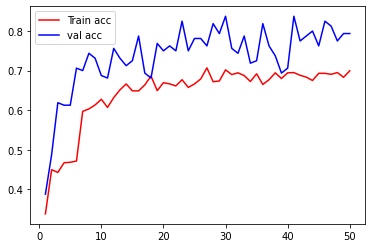

In [92]:
import matplotlib.pyplot as plt
acc = c_history.history['accuracy']
val_acc = c_history.history['val_accuracy']

epoch = range(1, len(acc)+1) #정확도의 개수

plt.plot(epoch, acc, c='red', label = 'Train acc') # 훈련 데이터 정확도
plt.plot(epoch, val_acc, c= 'blue', label = 'val acc') # 검증 데이터 정확도
plt.legend() #범례
plt.plot()

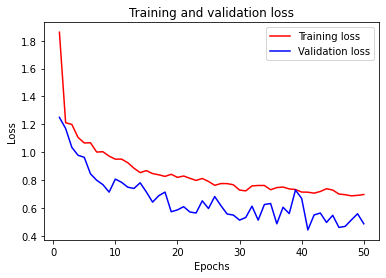

In [93]:
loss = c_history.history['loss']
val_loss = c_history.history['val_loss']

plt.plot(epoch, loss, 'red', label='Training loss')
plt.plot(epoch, val_loss, 'blue', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

In [94]:
from IPython.display import Image
from matplotlib.image import imread

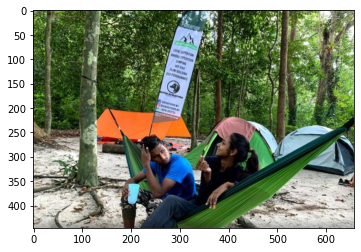

In [116]:
img = imread("C:/aiproject/pred/sample.jpg")
plt.imshow(img)

In [117]:
from skimage.transform import resize
resizeimg = resize(img,(128,128,3))

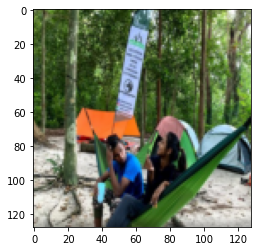

In [118]:
plt.imshow(resizeimg)

In [119]:
predictions = c_model.predict(np.array([resizeimg]))

predictions

array([[0.7423343 , 0.16297458, 0.04648965, 0.04820151]], dtype=float32)

In [120]:
result = np.argmax(predictions[0])
if result == 0:
    print("도시")
elif result == 1:
    print("숲")
elif result == 2:
    print("산")
else:
    print("바다")

도시
